## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Get the data

In [2]:
import os
import requests
import zipfile
import pandas as pd


url = "https://www.kaggle.com/api/v1/datasets/download/joebeachcapital/30000-spotify-songs"
zip_path = "spotify_songs.zip"
extract_path = "./datasets"
#create dataframe songs:


# Faz o download do arquivo zip
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

## Take a quick look at the dataset

In [3]:
csv_path = os.path.join(extract_path, "spotify_songs.csv")
songs = pd.read_csv(csv_path)
print(songs.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [4]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
pd.set_option('display.max_rows', None)
songs["playlist_genre"].value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [6]:
# Agrupar por 'playlist_genre' e calcular a média da popularidade
genre_popularity = songs.groupby("playlist_genre")["track_popularity"].mean()

# Ordenar os resultados em ordem decrescente
genre_popularity_sorted = genre_popularity.sort_values(ascending=False)

# Exibir os gêneros com músicas mais populares
print(genre_popularity_sorted)


playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64


In [7]:
# Encontrar o valor máximo de popularidade
max_popularity = songs["track_popularity"].max()

# Filtrar todas as músicas com a popularidade máxima
most_popular_songs = songs[songs["track_popularity"] == max_popularity]

# Exibir o resultado
print(most_popular_songs[["track_name", "track_popularity"]])


         track_name  track_popularity
1551   Dance Monkey               100
20091  Dance Monkey               100


In [8]:
# Ordenar as músicas pela popularidade em ordem decrescente
songs_sorted = songs.sort_values(by="track_popularity", ascending=False)

# Exibir apenas o nome das músicas, nome dos artistas e suas popularidades
(songs_sorted[["track_name", "track_popularity", "track_artist"]]).head(20)

,track_name,track_popularity,track_artist
20091,Dance Monkey,100,Tones and I
1551,Dance Monkey,100,Tones and I
21468,ROXANNE,99,Arizona Zervas
20092,ROXANNE,99,Arizona Zervas
23104,ROXANNE,99,Arizona Zervas
30202,ROXANNE,99,Arizona Zervas
9018,The Box,98,Roddy Ricch
1301,Circles,98,Post Malone
18308,Memories,98,Maroon 5
18307,Blinding Lights,98,The Weeknd


In [9]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


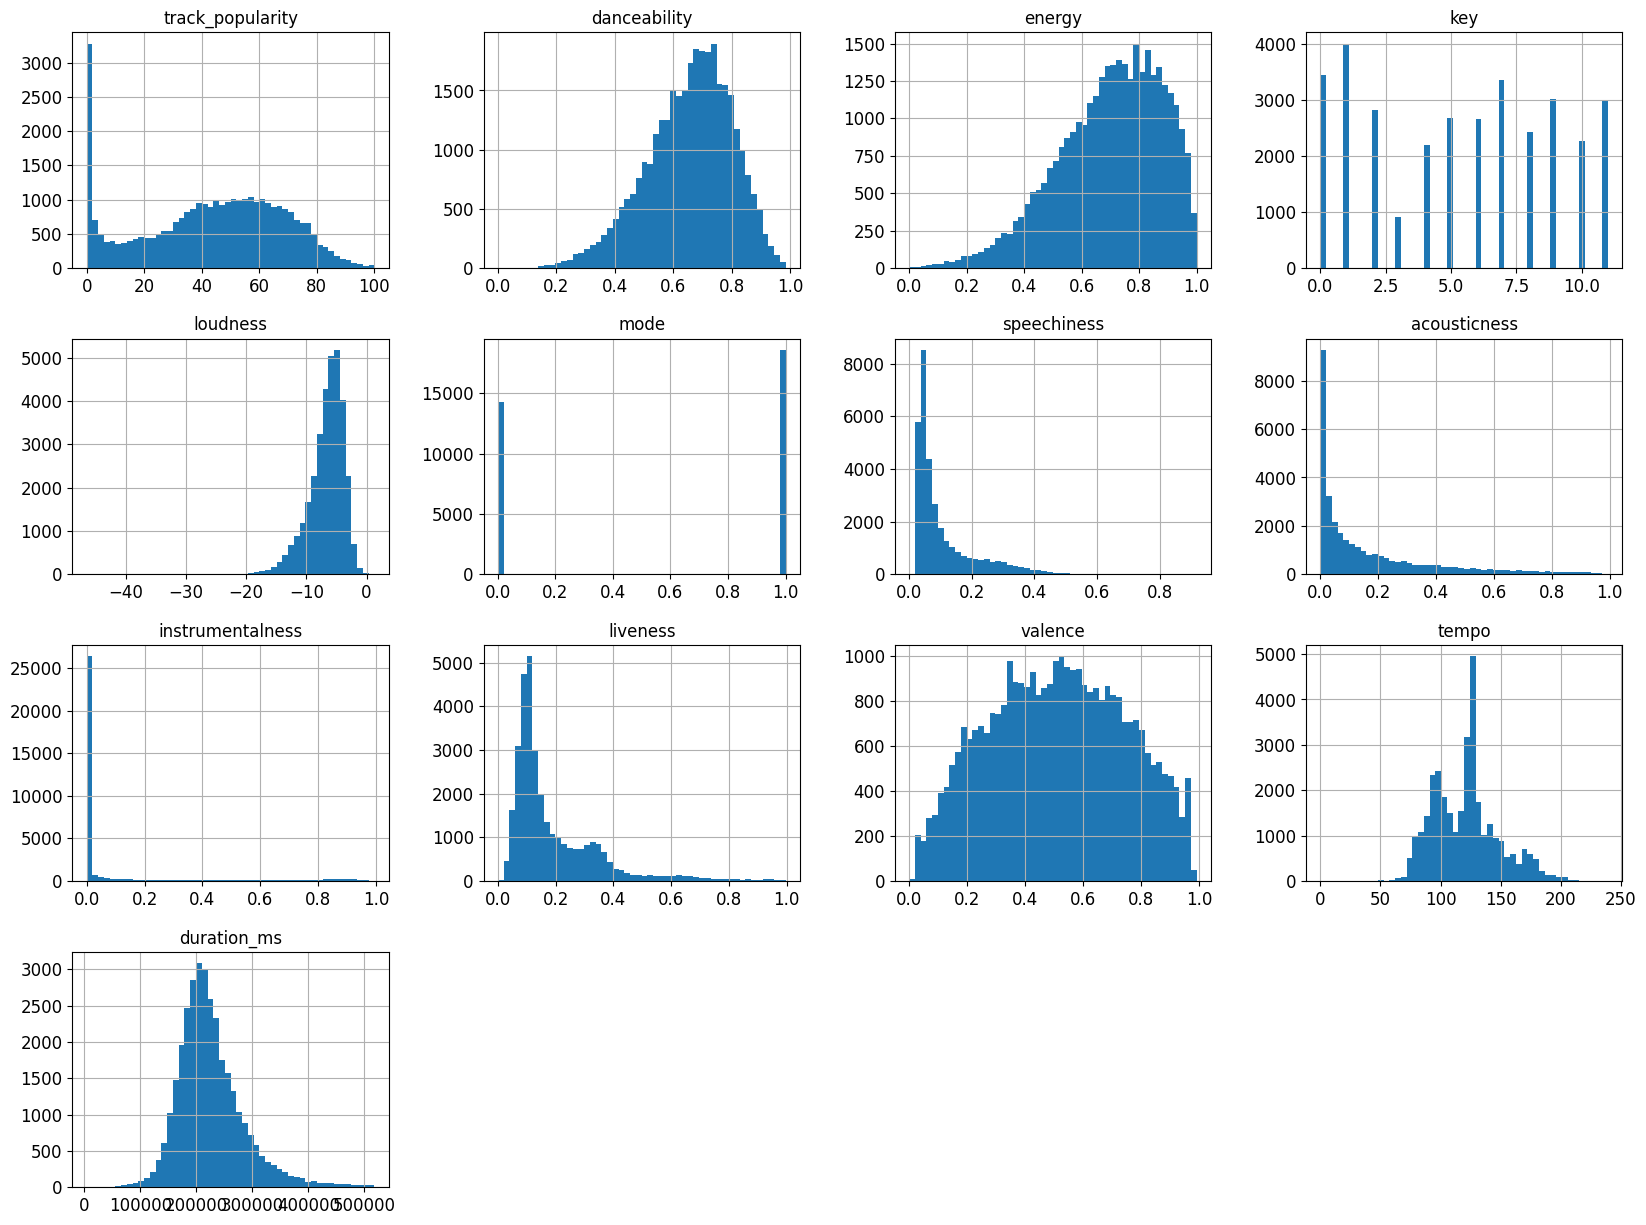

In [10]:
import matplotlib.pyplot as plt
songs.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Set Test

In [11]:
#to make this notebook's output identical at every run
np.random.seed(42)

In [12]:
import numpy as np# Use train_test_split to split the data into a training set and a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(songs, test_size=0.2, random_state=42)
len(train_set)

26266

In [13]:
len(test_set)

6567

## Criar uma cópia do conjunto de treino

In [14]:
songs_cp = songs.copy()

## Retirar músicas duplicadas

In [15]:
# Remover duplicatas, mantendo apenas uma ocorrência de cada 'track_name' e 'track_artist'
#songs_cp_unique = songs_cp.drop_duplicates(subset=["track_name", "track_artist"])

songs_cp_unique = songs_cp.drop_duplicates(subset=["track_id"])

#songs_cp_unique = songs_cp

# Ordenar pela popularidade para manter a ordem
#songs_cp_sorted = songs_cp_unique.sort_values(by="track_popularity", ascending=False)
songs_cp_sorted = songs_cp_unique.sort_values(by=["track_name", "track_artist"], ascending=False)


# Exibir as músicas sem duplicatas
songs_cp_sorted[["track_name", "track_popularity", "track_artist"]].head(20)

# Selecionar linha de indice do dataframe songs_cp_sorted com track_id 2XU0oxnq2qxCpomAAuJY8K
#songs_cp.loc[songs_cp["track_id"] == "2XU0oxnq2qxCpomAAuJY8K"]


,track_name,track_popularity,track_artist
471,하드캐리 Hard Carry,1,GOT7
445,피카부 Peek-A-Boo,70,Red Velvet
30481,중독 Overdose,4,EXO-K
30518,쉼표,30,Kozypop
26359,숙녀 (淑女) Lady,17,Yubin
30482,소방차 Fire Truck,0,NCT 127
30471,불타오르네 FIRE,0,BTS
1041,달라달라 DALLA DALLA,52,ITZY
30494,걔 세 I'm Him,0,WINNER
11393,霧のDOWN TOWN,28,オメガトライブ


In [16]:
songs_cp_sorted.sort_values(by="track_popularity", ascending=False)[["track_name", "track_popularity", "track_artist"]].head(20)

,track_name,track_popularity,track_artist
1551,Dance Monkey,100,Tones and I
20092,ROXANNE,99,Arizona Zervas
5508,The Box,98,Roddy Ricch
687,Tusa,98,KAROL G
711,Memories,98,Maroon 5
1301,Circles,98,Post Malone
716,Blinding Lights,98,The Weeknd
689,everything i wanted,97,Billie Eilish
1302,Don't Start Now,97,Dua Lipa
3155,Falling,97,Trevor Daniel


In [17]:
songs_cp = songs_cp_sorted
len(songs_cp_sorted)

28356

In [18]:
#songs_cp.loc[songs_cp["track_id"] == "69gRFGOWY9OMpFJgFol1u0"]
songs_cp.loc[11427]

track_id                            6syPPxFX5QgjxHARzThygJ
track_name                                        貴方しか見えない
track_artist                                  Junko Ohashi
track_popularity                                        17
track_album_id                      10BIzys0QO4l9UQGay0iRI
track_album_name            THE BEST SONGS of JUNKO OHASHI
track_album_release_date                              1998
playlist_name                        City Pop 1985 シティーポップ
playlist_id                         3j2osvmecEao5nmo9jZ5df
playlist_genre                                        rock
playlist_subgenre                               album rock
danceability                                         0.301
energy                                               0.568
key                                                      2
loudness                                            -6.786
mode                                                     0
speechiness                                         0.03

## Verificar datas

In [19]:
import pandas as pd

# Converter a coluna para datetime (caso ainda não esteja)
#songs_cp['track_album_release_date'] = pd.to_datetime(songs_cp['track_album_release_date'], errors='coerce')

# Verificar se houve conversão inválida (NaT)
print("Datas inválidas:", songs_cp['track_album_release_date'].isna().sum())

# Localizar o índice da linha com a data mais recente (max)
idx_mais_recente = songs_cp['track_album_release_date'].idxmax()
idx_menos_recente = songs_cp['track_album_release_date'].idxmin()

# Acessar a linha correspondente
musica_mais_recente = songs_cp.loc[idx_mais_recente]
musica_menos_recente = songs_cp.loc[idx_menos_recente]

print("Música mais recente do dataset:")
print(f"Música: {musica_mais_recente['track_name']} - Data: {musica_mais_recente['track_album_release_date']}")

print("\nMúsica menos recente do dataset:")
print(f"Música: {musica_menos_recente['track_name']} - Data: {musica_menos_recente['track_album_release_date']}")



Datas inválidas: 0
Música mais recente do dataset:
Música: 別世界 - Data: 2020-01-29

Música menos recente do dataset:
Música: Mess Around - Data: 1957-01-01


## Verificar linhas nulas/NaN

In [20]:
import pandas as pd

# Mostra todas as colunas que têm pelo menos um valor NaN
colunas_com_nan = songs_cp.columns[songs_cp.isna().any()].tolist()
print("Colunas com valores nulos/NaN:", colunas_com_nan)

# Quantos valores nulos cada coluna tem:
valores_nulos_por_coluna = songs_cp.isna().sum()
print("\nQuantidade de valores nulos por coluna:")
print(valores_nulos_por_coluna)

# Exibir amostras das linhas com NaN para cada coluna identificada
for col in colunas_com_nan:
    print(f"\n=== Amostra de linhas com valores nulos em '{col}' ===")
    linhas_com_nan = songs_cp[songs_cp[col].isna()]
    display(linhas_com_nan.head())  # mostra as 5 primeiras linhas que têm NaN nessa coluna


Colunas com valores nulos/NaN: ['track_name', 'track_artist', 'track_album_name']

Quantidade de valores nulos por coluna:
track_id                    0
track_name                  4
track_artist                4
track_popularity            0
track_album_id              0
track_album_name            4
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

=== Amostra de linhas com valores nulos em 'track_name' ===


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773



=== Amostra de linhas com valores nulos em 'track_artist' ===


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773



=== Amostra de linhas com valores nulos em 'track_album_name' ===


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773


In [21]:
# Mostrar sample de datas nulas no dataset
songs_cp[songs_cp["track_name"].isna()].sample(0)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [22]:
#mostrar todas as colunas através de um ID
songs_cp.loc[songs_cp["track_id"] == "6syPPxFX5QgjxHARzThygJ"]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11427,6syPPxFX5QgjxHARzThygJ,貴方しか見えない,Junko Ohashi,17,10BIzys0QO4l9UQGay0iRI,THE BEST SONGS of JUNKO OHASHI,1998,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,2,-6.786,0,0.0356,0.157,0.000061,0.109,0.128,80.354,292240


## Função para remover linhas com valores nulos

In [23]:

def remover_linhas_nulas(songs_cp):
    """
    Remove todas as linhas do DataFrame 'songs_cp' que contenham 
    pelo menos um valor nulo (NaN).
    Retorna um novo DataFrame sem linhas nulas.
    """
    songs_cp_sem_nulos = songs_cp.dropna(axis=0, how='any')
    return songs_cp_sem_nulos


In [24]:
""" songs_cp_sem_nulos = remover_linhas_nulas(songs_cp)
valores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()
print("\nQuantidade de valores nulos por coluna:")
songs_cp = songs_cp_sem_nulos
print(valores_nulos_por_coluna) """

' songs_cp_sem_nulos = remover_linhas_nulas(songs_cp)\nvalores_nulos_por_coluna = songs_cp_sem_nulos.isna().sum()\nprint("\nQuantidade de valores nulos por coluna:")\nsongs_cp = songs_cp_sem_nulos\nprint(valores_nulos_por_coluna) '

## Visualizando os dados

In [25]:
""" import seaborn as sns
sns.pairplot(songs_cp, vars=[ "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"], 
             hue="track_popularity")  # Por exemplo, colorindo por gênero
 """

' import seaborn as sns\nsns.pairplot(songs_cp, vars=[ "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"], \n             hue="track_popularity")  # Por exemplo, colorindo por gênero\n '

## Buscando correlações

In [26]:
# Se seu DataFrame é 'songs_cp', selecione apenas colunas numéricas
songs_cp_numeric = songs_cp.select_dtypes(include=['int64', 'float64'])

# Agora calcule a matriz de correlação apenas com colunas numéricas
corr_matrix = songs_cp_numeric.corr()

# Se quiser ver a correlação de uma coluna específica, substitua "alguma_coluna"
# por um nome de coluna que seja numérica
corr_matrix["track_popularity"].sort_values(ascending=False)


track_popularity    1.000000
acousticness        0.091725
danceability        0.046597
loudness            0.037285
valence             0.022581
mode                0.016275
speechiness         0.005206
tempo               0.004446
key                -0.008144
liveness           -0.052773
energy             -0.103622
instrumentalness   -0.124431
duration_ms        -0.139682
Name: track_popularity, dtype: float64

array([[<Axes: xlabel='track_popularity', ylabel='track_popularity'>,
        <Axes: xlabel='danceability', ylabel='track_popularity'>,
        <Axes: xlabel='energy', ylabel='track_popularity'>,
        <Axes: xlabel='loudness', ylabel='track_popularity'>,
        <Axes: xlabel='acousticness', ylabel='track_popularity'>,
        <Axes: xlabel='instrumentalness', ylabel='track_popularity'>,
        <Axes: xlabel='liveness', ylabel='track_popularity'>,
        <Axes: xlabel='duration_ms', ylabel='track_popularity'>],
       [<Axes: xlabel='track_popularity', ylabel='danceability'>,
        <Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='loudness', ylabel='danceability'>,
        <Axes: xlabel='acousticness', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>,
        <Axes: xlabel='liveness', ylabel='danceability'>,
        <Axes: xlabel='duration_ms', ylabel='dance

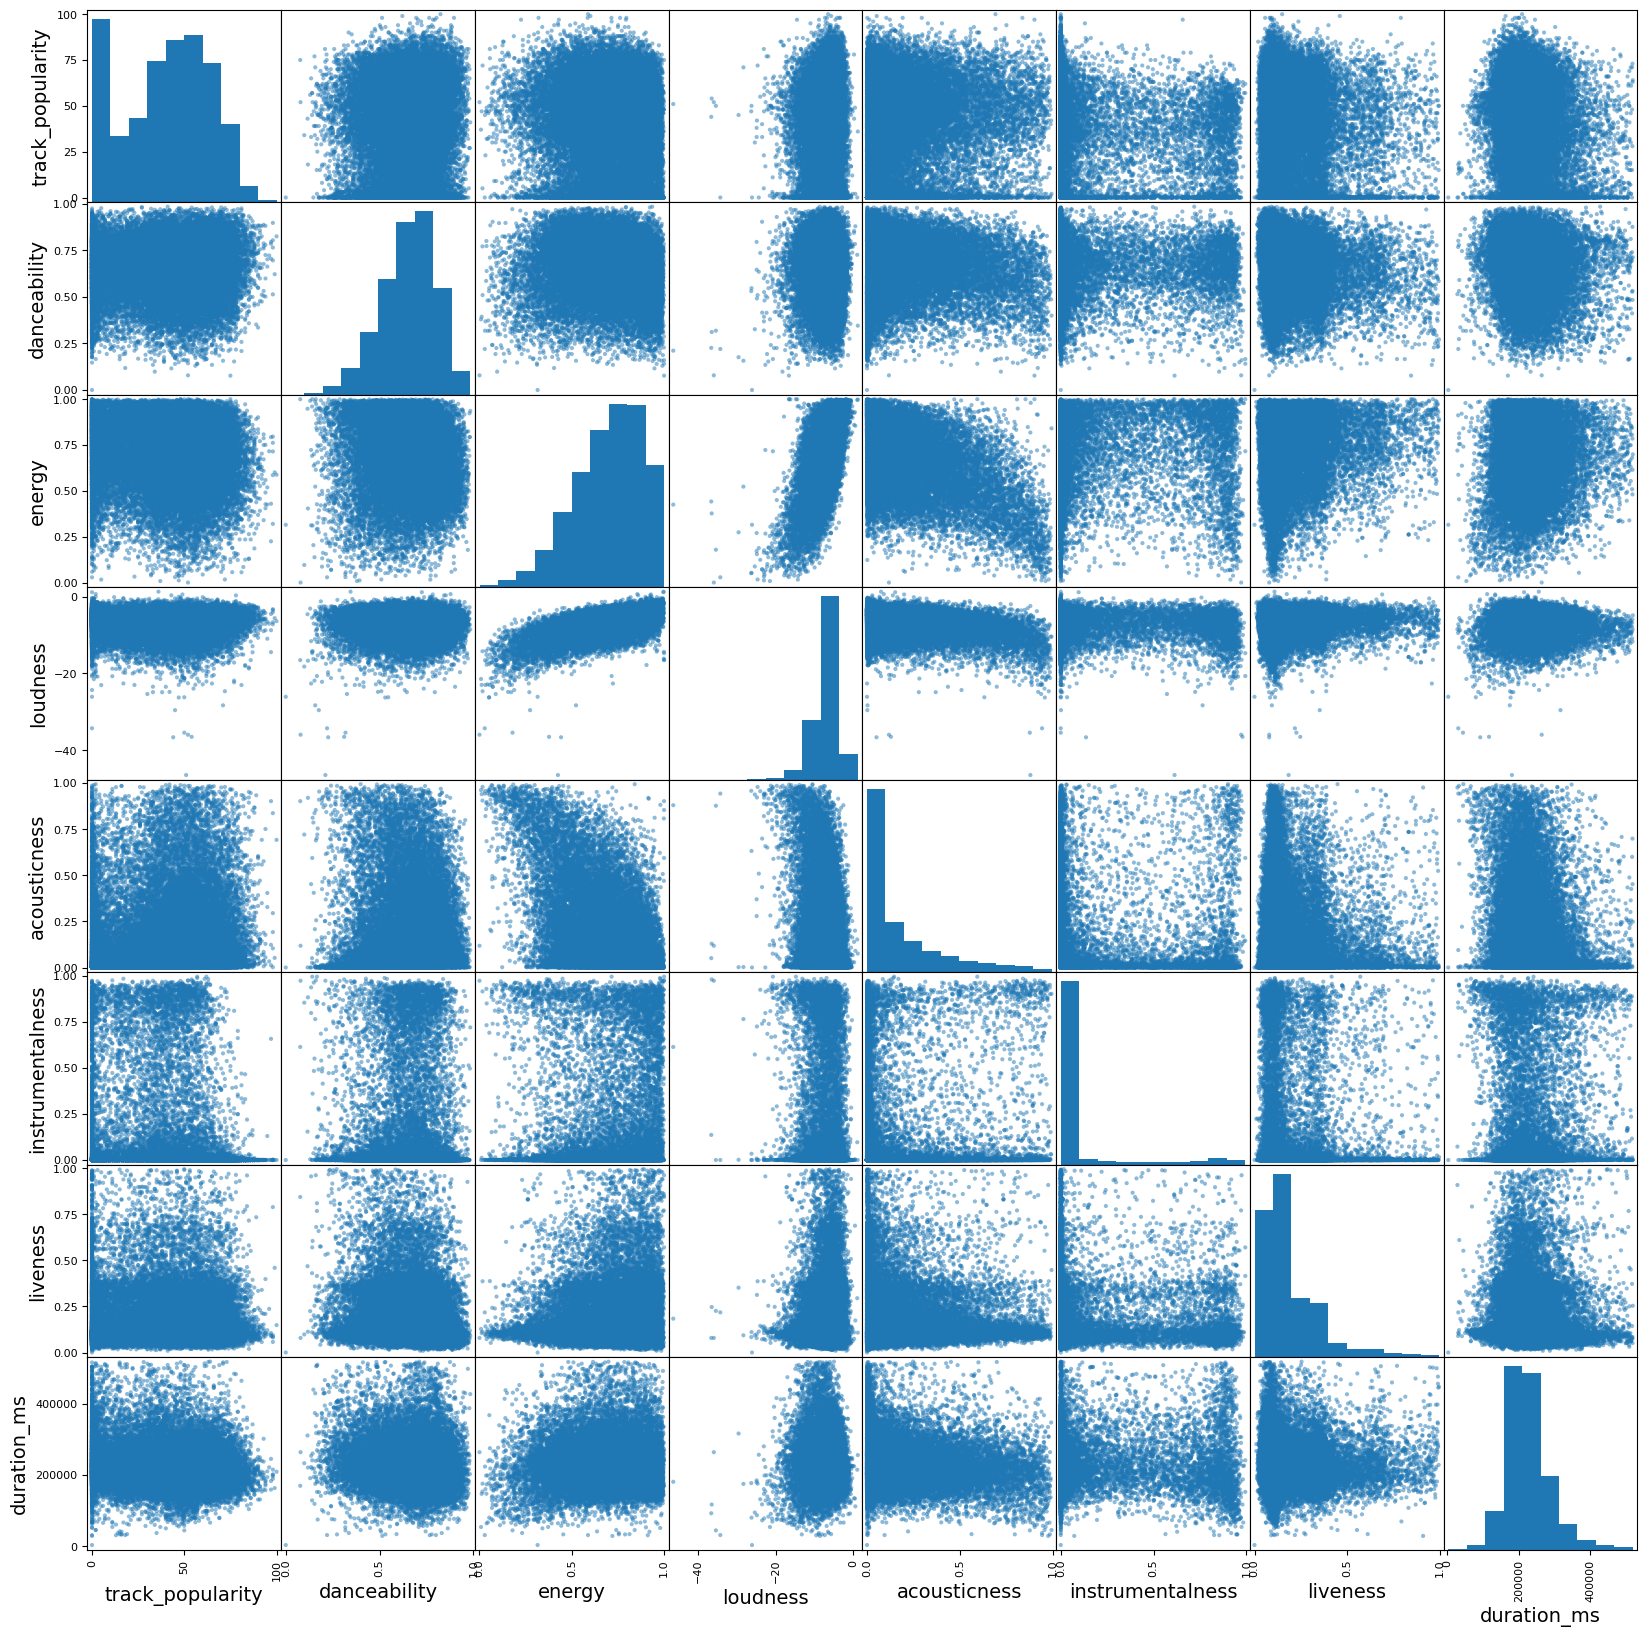

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["track_popularity", "danceability", "energy", "loudness", "acousticness", "instrumentalness", "liveness", "duration_ms"]
scatter_matrix(songs_cp[attributes], figsize=(20, 20))